# Прочерчивание максимумов Х-структуры -- построение коллажей


In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: <object object at 0x7f039823e8c0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
import os
import shutil
import pandas as pd
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.lines as mlines
import warnings
from astropy.visualization import astropy_mpl_style
import copy
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
from libs.mathFunctions import explaw
from libs.mathFunctions import fit_by_explaw

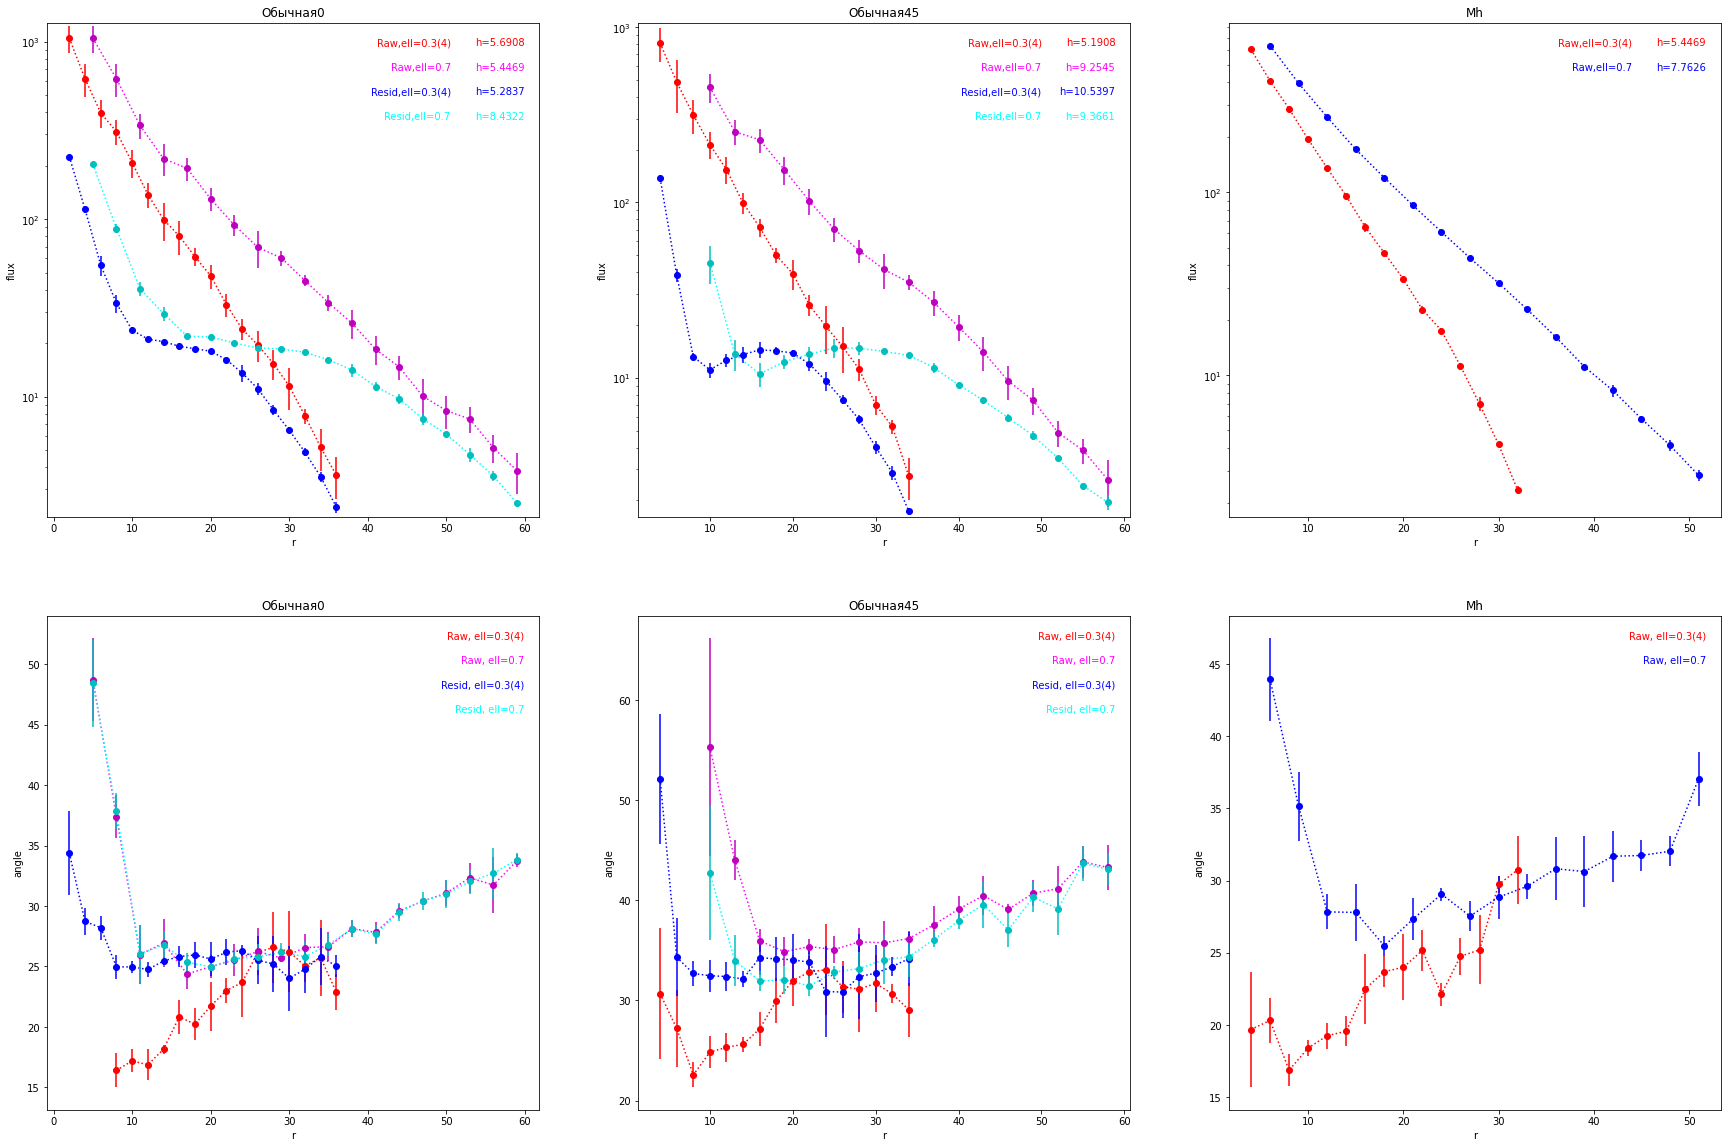

In [16]:
names = [['Обычная0','Обычная0_0_3',0.3],['Обычная45','Обычная45_0_4',0.4],['Mh','Mh_0_4',0.4],
         ['Обычная0','Обычная0_0_7',0.7],['Обычная45','Обычная45_0_7',0.7],['Mh','Mh_0_7',0.7]]

radii_dm,angles_dm,intens_dm = [],[],[]
central_value_dm, exp_scale_dm, list_maxs_dm, list_mins_dm = [],[],[],[]
path_collage_int = './result/collage_models.png'
for i in range(0,6): 
    
    name_gal = names[i][0]
    name_gal_ell = names[i][1]
    
    if i != 2 and i != 5:       
        path_image_d = './images/image_{}_d.fits'.format(name_gal)
        path_image_m = './images/image_{}_m.fits'.format(name_gal)
        path_angles_hand_d = './result/{}_d/angles_hand.dat'.format(name_gal_ell)
        path_angles_hand_m = './result/{}_m/angles_hand.dat'.format(name_gal_ell)
        path_coords_hand_m = './result/{}_m/coord_xy_peaks_hand.dat'.format(name_gal_ell)
        path_intens_hand_m = './result/{}_m/intensities_hand.dat'.format(name_gal_ell)  
        hdulist_image_d  = fits.open(path_image_d)
        data_image_d = hdulist_image_d[0].data
        hdulist_image_m  = fits.open(path_image_m)
        data_image_m = hdulist_image_m[0].data

        radii_hand_d = np.loadtxt(path_angles_hand_d, usecols=[0], comments='#') 
        radii_hand_m = np.loadtxt(path_angles_hand_m, usecols=[0], comments='#') 
        angles_hand_d = np.loadtxt(path_angles_hand_d, usecols=[9,10], comments='#') 
        angles_hand_m = np.loadtxt(path_angles_hand_m, usecols=[9,10], comments='#') 
        intens_hand_m = np.loadtxt(path_intens_hand_m, usecols=np.arange(1,11), comments='#') 
        coords_hand_m = np.loadtxt(path_coords_hand_m, usecols=np.arange(1,17), comments='#')    
        radii_dm.append(radii_hand_d)
        radii_dm.append(radii_hand_m)
        angles_dm.append(angles_hand_d)
        angles_dm.append(angles_hand_m)
        
        intens_hand_d = np.zeros((radii_hand_m.size,10))
        for jj1 in range (1,9):
            for jj in range(radii_hand_m.size):
                intens_hand_d[jj,jj1-1] = data_image_d[int(coords_hand_m[jj,jj1+7])][int(coords_hand_m[jj,jj1-1])]
                if intens_hand_d[jj,jj1-1] < 0:
                    intens_hand_d[jj,jj1-1] = None
                if intens_hand_m[jj,jj1-1] < 0:
                    intens_hand_m[jj,jj1-1] = None
        for jj in range(radii_hand_m.size):
            for_intens_hand_d = [intf for intf in intens_hand_d[jj,0:8] if intf != None and intf > 0.0]
            intens_hand_d[jj,8] = np.average(for_intens_hand_d) 
            intens_hand_d[jj,9] = np.std(for_intens_hand_d)
        intens_dm.append(intens_hand_d)
        intens_dm.append(intens_hand_m)

        central_value_d, exp_scale_d = fit_by_explaw(radii_hand_m, intens_hand_d[:,8], intens_hand_d[:,9])
        central_value_m, exp_scale_m = fit_by_explaw(radii_hand_m, intens_hand_m[:,8], intens_hand_m[:,9])
        central_value_dm.append(central_value_d)
        central_value_dm.append(central_value_m)
        exp_scale_dm.append(exp_scale_d)
        exp_scale_dm.append(exp_scale_m)
        list_maxs, list_mins = [],[]
        for lobe_number in range(0, 8):
            list_maxs.append(max(intens_hand_d[:,lobe_number]))
            list_maxs.append(max(intens_hand_m[:,lobe_number]))
            list_mins.append(min(intens_hand_d[:,lobe_number]))
            list_mins.append(min(intens_hand_m[:,lobe_number]))
        list_maxs_dm.append(max(list_maxs))
        list_mins_dm.append(min(list_mins))
    else:
        path_angles_hand = './result/{}/angles_hand.dat'.format(name_gal_ell)
        path_intens_hand = './result/{}/intensities_hand.dat'.format(name_gal_ell)  
        radii_hand = np.loadtxt(path_angles_hand, usecols=[0], comments='#') 
        angles_hand = np.loadtxt(path_angles_hand, usecols=[9,10], comments='#') 
        intens_hand = np.loadtxt(path_intens_hand, usecols=np.arange(1,11), comments='#') 
        radii_dm.append(radii_hand)
        angles_dm.append(angles_hand)
        for jj1 in range (1,9):
            for jj in range(radii_hand.size):
                if intens_hand[jj,jj1-1] < 0:
                    intens_hand[jj,jj1-1] = None 
        # т.к. мб intens = None, то нужно пересчитать mean и std
        intens_dm.append(intens_hand)
        central_value, exp_scale = fit_by_explaw(radii_hand, intens_hand[:,8], intens_hand[:,9])
        central_value_dm.append(central_value)
        exp_scale_dm.append(exp_scale)
        list_maxs, list_mins = [],[]
        for lobe_number in range(0, 8):
            list_maxs.append(max(intens_hand[:,lobe_number]))
            list_mins.append(min(intens_hand[:,lobe_number]))
        list_maxs_dm.append(max(list_maxs))
        list_mins_dm.append(min(list_mins))

    

fig = plt.figure(figsize=[30,20])
dp = 0
for i in range(0,3):
    if i != 2: 
        plt.subplot(2,3,i+1)
        plt.plot(radii_dm[i+1+dp], intens_dm[i+dp][:,8],color='red',linestyle=":")
        plt.plot(radii_dm[i+1+dp+5], intens_dm[i+dp+5][:,8],color='magenta',linestyle=":")
        plt.plot(radii_dm[i+1+dp], intens_dm[i+dp+1][:,8],color='blue',linestyle=":")
        plt.plot(radii_dm[i+1+dp+5], intens_dm[i+dp+6][:,8],color='cyan',linestyle=":")
        plt.errorbar(x=radii_dm[i+1+dp], y=intens_dm[i+dp][:,8], yerr=intens_dm[i+dp][:,9], fmt="ro")
        plt.errorbar(x=radii_dm[i+1+dp+5], y=intens_dm[i+dp+5][:,8], yerr=intens_dm[i+dp+5][:,9], fmt="mo")
        plt.errorbar(x=radii_dm[i+1+dp], y=intens_dm[i+dp+1][:,8], yerr=intens_dm[i+dp+1][:,9], fmt="bo")
        plt.errorbar(x=radii_dm[i+1+dp+5], y=intens_dm[i+dp+6][:,8], yerr=intens_dm[i+dp+6][:,9], fmt="co")
        plt.text(0.97,0.97,'h=%1.4f' % exp_scale_dm[i+dp], ha='right',va='top',color='red',
                                                                           transform = plt.gca().transAxes)
        plt.text(0.97,0.92,'h=%1.4f' % exp_scale_dm[i+dp+4], ha='right',va='top',color='magenta',
                                                                           transform = plt.gca().transAxes)
        plt.text(0.97,0.87,'h=%1.4f' % exp_scale_dm[i+dp+1], ha='right',va='top',color='blue',
                                                                           transform = plt.gca().transAxes)
        plt.text(0.97,0.82,'h=%1.4f' % exp_scale_dm[i+dp+5], ha='right',va='top',color='cyan',
                                                                           transform = plt.gca().transAxes)
        plt.text(0.82,0.97,'Raw,ell=0.3(4)', ha='right',va='top',color='red',transform = plt.gca().transAxes)
        plt.text(0.82,0.92,'Raw,ell=0.7', ha='right',va='top',color='magenta',transform = plt.gca().transAxes)
        plt.text(0.82,0.87,'Resid,ell=0.3(4)', ha='right',va='top',color='blue',transform = plt.gca().transAxes)
        plt.text(0.82,0.82,'Resid,ell=0.7', ha='right',va='top',color='cyan',transform = plt.gca().transAxes)
        plt.xlabel("r")
        plt.ylabel("flux")
        plt.yscale('log')
        plt.ylim(list_mins_dm[i],list_maxs_dm[i])
        plt.title(names[i][0])
        
        plt.subplot(2,3,i+4)
        plt.plot(radii_dm[i+dp], angles_dm[i+dp][:,0],color='red',linestyle=":")
        plt.plot(radii_dm[i+dp+5], angles_dm[i+dp+5][:,0],color='magenta',linestyle=":")
        plt.plot(radii_dm[i+dp+1], angles_dm[i+dp+1][:,0],color='blue',linestyle=":")
        plt.plot(radii_dm[i+dp+6], angles_dm[i+dp+6][:,0],color='cyan',linestyle=":")
        plt.errorbar(x=radii_dm[i+dp], y=angles_dm[i+dp][:,0], yerr=angles_dm[i+2*dp][:,1], fmt="ro")
        plt.errorbar(x=radii_dm[i+dp+5], y=angles_dm[i+dp+5][:,0], yerr=angles_dm[i+dp+5][:,1], fmt="mo")
        plt.errorbar(x=radii_dm[i+dp+1], y=angles_dm[i+dp+1][:,0], yerr=angles_dm[i+dp+1][:,1], fmt="bo")
        plt.errorbar(x=radii_dm[i+dp+6], y=angles_dm[i+dp+6][:,0], yerr=angles_dm[i+dp+6][:,1], fmt="co")
        plt.text(0.97,0.97,'Raw, ell=0.3(4)', ha='right',va='top',color='red',transform = plt.gca().transAxes)
        plt.text(0.97,0.92,'Raw, ell=0.7', ha='right',va='top',color='magenta',transform = plt.gca().transAxes)
        plt.text(0.97,0.87,'Resid, ell=0.3(4)', ha='right',va='top',color='blue',transform = plt.gca().transAxes)
        plt.text(0.97,0.82,'Resid, ell=0.7', ha='right',va='top',color='cyan',transform = plt.gca().transAxes)
        #plt.xlim([min(list_x_mins)-5,max(list_x_maxs)+5])
        #plt.ylim([min(list_y_mins)-5,max(list_y_maxs)+5])
        plt.title(names[i][0])
        plt.xlabel("r")
        plt.ylabel("angle")
        
        dp +=1
    else:
        plt.subplot(2,3,i+1)
        plt.plot(radii_dm[4], intens_dm[4][:,8],color='red',linestyle=":")
        plt.plot(radii_dm[9], intens_dm[9][:,8],color='blue',linestyle=":")
        plt.errorbar(x=radii_dm[4], y=intens_dm[4][:,8], yerr=intens_dm[4][:,9], fmt="ro")
        plt.errorbar(x=radii_dm[9], y=intens_dm[9][:,8], yerr=intens_dm[9][:,9], fmt="bo")
        plt.text(0.97,0.97,'h=%1.4f' % exp_scale_dm[4], ha='right',va='top',color='red',
                                                                           transform = plt.gca().transAxes)
        plt.text(0.97,0.92,'h=%1.4f' % exp_scale_dm[9], ha='right',va='top',color='blue',
                                                                           transform = plt.gca().transAxes)
        plt.text(0.82,0.97,'Raw,ell=0.3(4)', ha='right',va='top',color='red',transform = plt.gca().transAxes)
        plt.text(0.82,0.92,'Raw,ell=0.7', ha='right',va='top',color='blue',transform = plt.gca().transAxes)
        plt.xlabel("r")
        plt.ylabel("flux")
        plt.yscale('log')
        #plt.ylim(list_mins_dm[i],list_maxs_dm[i])
        plt.title(names[i][0])
        
        plt.subplot(2,3,i+4)
        plt.plot(radii_dm[4], angles_dm[4][:,0],color='red',linestyle=":")
        plt.plot(radii_dm[9], angles_dm[9][:,0],color='blue',linestyle=":")
        plt.errorbar(x=radii_dm[4], y=angles_dm[4][:,0], yerr=angles_dm[4][:,1], fmt="ro")
        plt.errorbar(x=radii_dm[9], y=angles_dm[9][:,0], yerr=angles_dm[9][:,1], fmt="bo")  
        plt.text(0.97,0.97,'Raw, ell=0.3(4)', ha='right',va='top',color='red',transform = plt.gca().transAxes)
        plt.text(0.97,0.92,'Raw, ell=0.7', ha='right',va='top',color='blue',transform = plt.gca().transAxes)
        plt.title(names[i][0])
        plt.xlabel("r")
        plt.ylabel("angle")
         
plt.savefig(path_collage_int,dpi=200,bbox_inches = 'tight',pad_inches = 0.1)
plt.show()
        